In [1]:
#leo Johnson
# orginal author: josephlee94

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('housepricedata.csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
dataset = df.values

In [6]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [7]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

E:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3987 - loss: 0.7173 - val_accuracy: 0.3196 - val_loss: 0.7059
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3332 - loss: 0.7069 - val_accuracy: 0.4475 - val_loss: 0.6972
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.3956 - loss: 0.6999 - val_accuracy: 0.5845 - val_loss: 0.6906
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.5132 - loss: 0.6947 - val_accuracy: 0.6210 - val_loss: 0.6850
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.5607 - loss: 0.6880 - val_accuracy: 0.6210 - val_loss: 0.6794
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.5933 - loss: 0.6788 - val_accuracy: 0.6210 - val_loss: 0.6740
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.6508 - loss: 0.6712 - val_accuracy: 0.6393 - val_loss: 0.6700
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.6970 - loss: 0.6649 - val_accuracy

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8743 - loss: 0.3502 - val_accuracy: 0.8493 - val_loss: 0.4019
Epoch 52/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8755 - loss: 0.3323 - val_accuracy: 0.8493 - val_loss: 0.3999
Epoch 53/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.8722 - loss: 0.3331 - val_accuracy: 0.8493 - val_loss: 0.3976
Epoch 54/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8688 - loss: 0.3436 - val_accuracy: 0.8493 - val_loss: 0.3949
Epoch 55/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8831 - loss: 0.3185 - val_accuracy: 0.8493 - val_loss: 0.3923
Epoch 56/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8731 - loss: 0.3376 - val_accuracy: 0.8493 - val_loss: 0.3905
Epoch 57/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.8793 - loss: 0.3195 - val_accuracy: 0.8493 - val_loss: 0.3891
Epoch 58/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8938 - loss: 0.3024 - val_accuracy:

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.9221 - loss: 0.2623


0.9086757898330688

In [20]:
import matplotlib.pyplot as plt

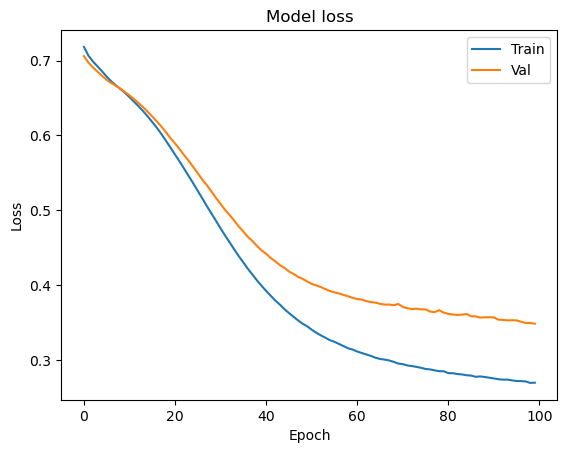

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

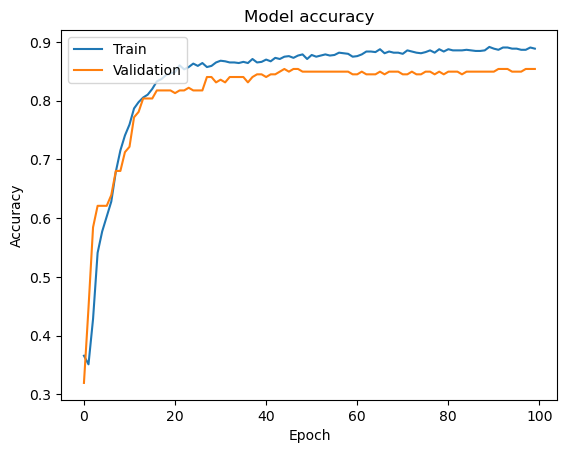

In [24]:
plt.plot(hist.history['accuracy'])  # Use 'accuracy' instead of 'acc'
plt.plot(hist.history['val_accuracy'])  # Use 'val_accuracy' instead of 'val_acc'
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100


E:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6999 - loss: 0.5129 - val_accuracy: 0.8128 - val_loss: 0.4656
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8697 - loss: 0.3254 - val_accuracy: 0.7945 - val_loss: 0.4958
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8709 - loss: 0.3234 - val_accuracy: 0.8265 - val_loss: 0.3643
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8810 - loss: 0.3154 - val_accuracy: 0.8311 - val_loss: 0.3908
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8819 - loss: 0.2627 - val_accuracy: 0.8493 - val_loss: 0.3390
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9080 - loss: 0.2385 - val_accuracy: 0.8539 - val_loss: 0.3149
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9041 - loss: 0.2360 - val_accuracy: 0.8584 - val_loss: 0.3172
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9123 - loss: 0.2243 - val_accuracy: 0.8721 - val_loss: 0.3

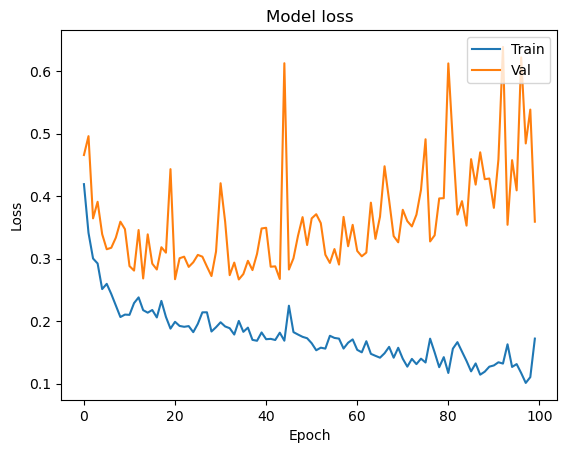

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

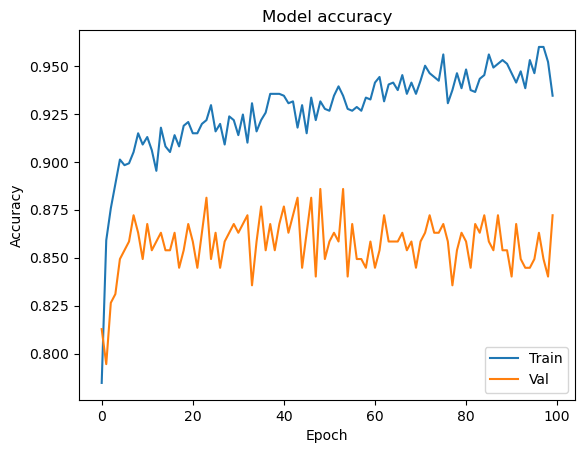

In [28]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [29]:
from keras.layers import Dropout
from keras import regularizers

In [30]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [31]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5474 - loss: 21.1170 - val_accuracy: 0.7671 - val_loss: 3.9111
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8119 - loss: 2.5160 - val_accuracy: 0.8402 - val_loss: 0.7187
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8444 - loss: 0.6285 - val_accuracy: 0.8539 - val_loss: 0.5605
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8688 - loss: 0.5160 - val_accuracy: 0.8402 - val_loss: 0.5533
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8759 - loss: 0.4697 - val_accuracy: 0.8584 - val_loss: 0.5444
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8898 - loss: 0.4656 - val_accuracy: 0.8447 - val_loss: 0.5428
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8878 - loss: 0.4483 - val_accuracy: 0.8265 - val_loss: 0.5724
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8760 - loss: 0.4908 - val_accuracy: 0.8447 - 

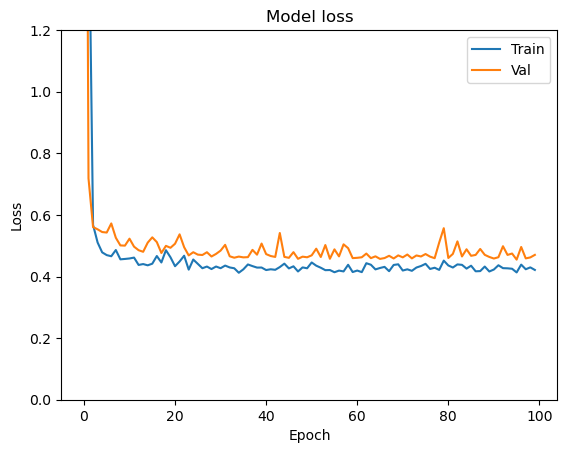

In [32]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

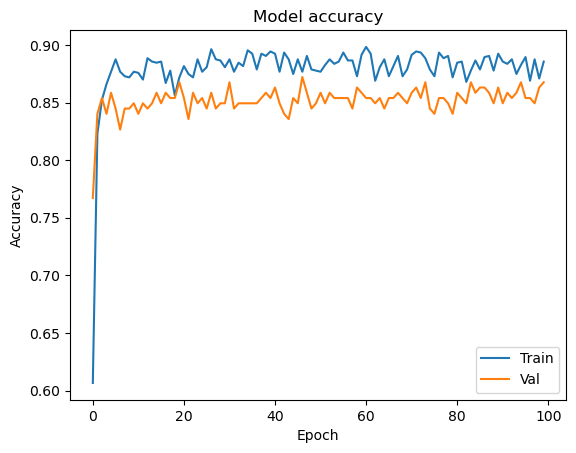

In [34]:

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()